In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving stroke_himu.xlsx to stroke_himu.xlsx


{'stroke_himu.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00|l\x98\x16l\x01\x00\x00\xa0\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
data=pd.read_excel('stroke_himu.xlsx')

In [ ]:
df=data

In [ ]:
list(df.columns)

['age_codes',
 'gender_codes',
 'Door to needle time (min)',
 'door-door_codes',
 'neurological deficit_codes',
 'CODING WINDOW ',
 'NIHSS on admission_codes',
 'MRS',
 'Hyper tension 1-yes              2- No',
 'DM',
 'BP_codes',
 'Blod sugar_codes',
 'CODING ANT. POST. COMBINATION',
 'LARGE Vs SMALL ARTERY',
 'HAGE',
 'dosage_codes',
 'NIHSS after 1 hr',
 '  NIHSS after 6 hrs',
 '   NIHSS on discharge/ MRS',
 'outcome_codes',
 'CAD ',
 'smoke_code',
 'stroke history_codes']

In [ ]:
df=df.rename(columns={'Hyper tension 1-yes              2- No':'Hypertension','Blod sugar_codes':'blood sugar_codes'
,'  NIHSS after 6 hrs':'NIHSS after 6hrs',
 '   NIHSS on discharge/ MRS':'NIHSS on discharge'})

In [ ]:
df.head(1)

,age_codes,gender_codes,Door to needle time (min),door-door_codes,neurological deficit_codes,CODING WINDOW,NIHSS on admission_codes,MRS,Hypertension,DM,BP_codes,blood sugar_codes,CODING ANT. POST. COMBINATION,LARGE Vs SMALL ARTERY,HAGE,dosage_codes,NIHSS after 1 hr,NIHSS after 6hrs,NIHSS on discharge,outcome_codes,CAD,smoke_code,stroke history_codes
0,6,1.0,20,2,1,1,4,4.0,1,1,2,3,1,1.0,1,3.0,12.0,10.0,0.0,1,2.0,2.0,2


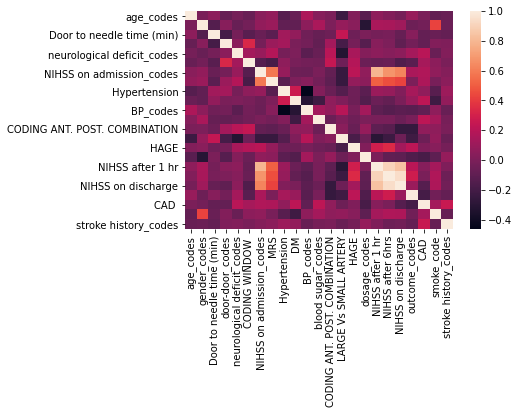

In [ ]:
from pandas import DataFrame
import seaborn as sn

corrMatrix = df.corr()
sn.heatmap(corrMatrix)

In [ ]:
import numpy as np

In [ ]:
columns = np.full((corrMatrix.shape[0],), True, dtype=bool)
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
        if corrMatrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [ ]:
df.shape

(185, 21)

In [ ]:
df.head(1)

,age_codes,gender_codes,Door to needle time (min),door-door_codes,neurological deficit_codes,CODING WINDOW,NIHSS on admission_codes,MRS,Hypertension,DM,BP_codes,blood sugar_codes,CODING ANT. POST. COMBINATION,LARGE Vs SMALL ARTERY,HAGE,dosage_codes,NIHSS after 1 hr,outcome_codes,CAD,smoke_code,stroke history_codes
0,6,1.0,20,2,1,1,4,4.0,1,1,2,3,1,1.0,1,3.0,12.0,1,2.0,2.0,2


In [ ]:
def check(v):
  if v>=1 and v<=4:
    return 1
  if v>=5 and v<=8:
    return 2
  if v>=9 and v<=12:
    return 3
  if v>=13 and v<=16:
    return 4
  if v>16:
    return 5


In [ ]:



for i in df['NIHSS after 1 hr']:
  i=check(i)

In [ ]:
for i in df['NIHSS on admission_codes']:
  i=check(i)

In [ ]:
target=df.columns['outcome_codes']
imput=df.drop(['outcome_codes'],axis=1)